### Classification on Forest Dataset

   
**Problem Statement:**
1. Predict the possibilities of fire on the given dataset.
2. Apply any classification algorithm for gaining optimal result.
3. Give reason of selecting the classification algorithm.

In [2]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Reading the dataset**

There were two regions in the dataset for forest fires in the Algerian forests viz. Bejaia and Sidi-
Bel Abbes The workbook was converted from csv to xlsx format and was divided into 2 data sheets
for the two regions.

In [4]:
#Region 1 - Bejaia
bejaia = pd.read_excel("Datasets/Algerian_forest_fires.xlsx",sheet_name="Bejaia")
bejaia.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [5]:
#Region 1 - Sidi-Beala
sb = pd.read_excel("Datasets/Algerian_forest_fires.xlsx",sheet_name="sidi-bela")
sb.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


### EDA

In [6]:
bejaia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4   RH           122 non-null    int64  
 5   Ws           122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
 13  Classes      122 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 13.5+ KB


In [7]:
sb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4   RH           122 non-null    int64  
 5   Ws           122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    object 
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    object 
 13  Classes      121 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 13.5+ KB


In [8]:
bejaia.shape

(122, 14)

In [9]:
sb.shape

(122, 14)

In [10]:
bejaia.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [11]:
sb.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [12]:
#Removing whitespace from the dataset
bejaia.columns = bejaia.columns.str.lstrip()
bejaia.columns = bejaia.columns.str.rstrip()
sb.columns = sb.columns.str.lstrip()
sb.columns = sb.columns.str.rstrip()

In [13]:
#Removing missing values from the sidi-bel dataset
sb = sb.dropna()
sb.shape

(121, 14)

In [14]:
#Keeping only the relevant columns
bejaia = bejaia.iloc[:,3:]
sb = sb.iloc[:,3:]

In [15]:
bejaia.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [16]:
sb.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


**Datatypes of both datasets**

In [61]:
bejaia.dtypes

Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

In [62]:
sb.dtypes

Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC              object
ISI            float64
BUI            float64
FWI             object
Classes         object
dtype: object

In [17]:
sb["DC"] = np.float64(sb["DC"])
sb["FWI"] = np.float64(sb["FWI"])

In [18]:
sb.dtypes

Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

### Converting categorical variables

In [19]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
bejaia["Classes"]=LE.fit_transform(bejaia["Classes"])
sb["Classes"]=LE.fit_transform(sb["Classes"])

In [24]:
print("Bejaia\n", bejaia.Classes.head())
print("Sidi-bel\n", sb.Classes.head())

Bejaia
 0    1
1    1
2    1
3    1
4    1
Name: Classes, dtype: int32
Sidi-bel
 0    1
1    1
2    1
3    1
4    1
Name: Classes, dtype: int32


**0: denotes Fire  
1: denotes Not Fire**

### Visualization

**Heatmap for correlation (Bejaia)**

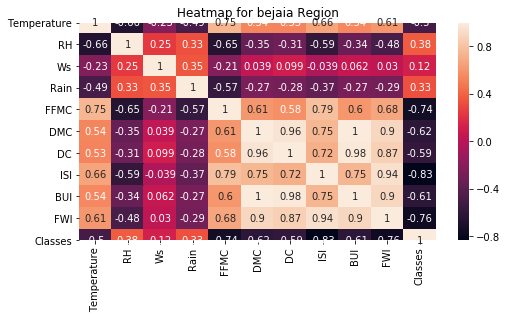

In [67]:
plt.figure(figsize=(8,4))
sns.heatmap(bejaia.corr(),annot=True)
plt.title("Heatmap for bejaia Region")
plt.show()

**Comment:** There is a strong positive correlation of class with relative humidity in bejaia region

**Heatmap for correlation (Sidi-Bela)**

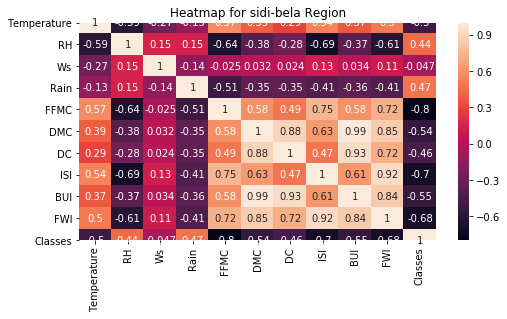

In [68]:
plt.figure(figsize=(8,4))
sns.heatmap(sb.corr(),annot=True)
plt.title("Heatmap for sidi-bela Region")
plt.show()

**Comment:** There is a strong positive correlation of class with rain in sidi-bela regions.

**Forest fire count for Bejaia**

In [69]:
bejaia.Classes.value_counts()

1    63
0    59
Name: Classes, dtype: int64

Text(0.5, 1.0, 'Forest Fire count for bejaia region')

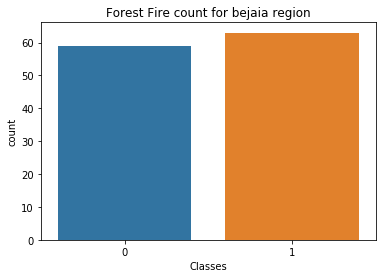

In [70]:
sns.countplot(x="Classes",data=bejaia)
plt.title("Forest Fire count for bejaia region")

**Forest fire count for Sidi-Bela**

In [71]:
sb.Classes.value_counts()

0    78
1    43
Name: Classes, dtype: int64

Text(0.5, 1.0, 'Forest Fire count for sidi-bel region')

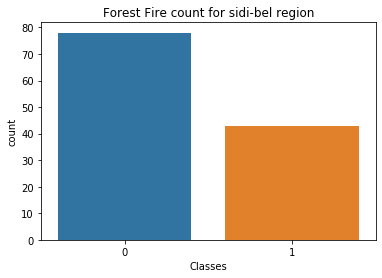

In [72]:
sns.countplot(x="Classes",data=sb)
plt.title("Forest Fire count for sidi-bel region")

## Building Classification Models

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Bejaia region forest fire

In [26]:
bejaia.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes'],
      dtype='object')

In [27]:
X = bejaia.iloc[:, :-1].values
y = bejaia.iloc[:, -1].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

**Logistic Regression**

In [31]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[21  0]
 [ 0 20]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        20

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



In [38]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy of the Logistic Regression Model: ', round(acc * 100, 2), "%")

Accuracy of the Logistic Regression Model:  100.0 %


**Naive-Bayes**

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gn = gnb.predict(X_test)

In [41]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_gn))
print('\nClassification Report:')
print(classification_report(y_test, y_pred_gn))

Confusion Matrix:
[[21  0]
 [ 1 19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.95      0.97        20

    accuracy                           0.98        41
   macro avg       0.98      0.97      0.98        41
weighted avg       0.98      0.98      0.98        41



In [43]:
acc2 = accuracy_score(y_test, y_pred_gn)
print('Accuracy of the Naive Bayes Model: ', round(acc2 * 100, 2), "%")

Accuracy of the Naive Bayes Model:  97.56 %


**Random Forest**

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [52]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))
print('\nClassification Report:')
print(classification_report(y_test, y_pred_rf))

Confusion Matrix:
[[21  0]
 [ 0 20]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        20

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



In [53]:
acc3 = accuracy_score(y_test, y_pred_rf)
print('Accuracy of the Random Forest Model: ', round(acc3 * 100, 2), "%")

Accuracy of the Random Forest Model:  100.0 %


Forest fires in the Bejaia region is predicted most accurately by the Logistic Regression and Random Forest algorithms alike, with an accuracy of 100%!

### Sidi-Bela region Forest fire

In [54]:
sb.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes'],
      dtype='object')

In [60]:
Xsb = sb.iloc[:,:-1].values
ysb = sb.iloc[:,-1].values

In [75]:
Xsb_train, Xsb_test, ysb_train, ysb_test = train_test_split(Xsb, ysb, test_size=0.33)

**Logistic Regression**

In [76]:
LR_sb = LogisticRegression()
LR_sb.fit(Xsb_train,ysb_train)
y_pred2 = LR_sb.predict(Xsb_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
print('Confusion Matrix:')
print(confusion_matrix(ysb_test, y_pred2))
print('\nClassification Report:')
print(classification_report(ysb_test, y_pred2))

Confusion Matrix:
[[28  2]
 [ 0 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        30
           1       0.83      1.00      0.91        10

    accuracy                           0.95        40
   macro avg       0.92      0.97      0.94        40
weighted avg       0.96      0.95      0.95        40



In [78]:
acc_sb = accuracy_score(ysb_test, y_pred2)
print('Accuracy of the Logistic Regression Model: ', round(acc_sb * 100, 2), "%")

Accuracy of the Logistic Regression Model:  95.0 %


**Naive Bayes**

In [79]:
gnb_sb = GaussianNB()
gnb_sb.fit(Xsb_train,ysb_train)
y_pred2_gnb = gnb_sb.predict(Xsb_test)

In [81]:
print('Confusion Matrix:')
print(confusion_matrix(ysb_test, y_pred2_gnb))
print('\nClassification Report:')
print(classification_report(ysb_test, y_pred2_gnb))

Confusion Matrix:
[[27  3]
 [ 0 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        30
           1       0.77      1.00      0.87        10

    accuracy                           0.93        40
   macro avg       0.88      0.95      0.91        40
weighted avg       0.94      0.93      0.93        40



In [82]:
acc2_sb = accuracy_score(ysb_test, y_pred2_gnb)
print('Accuracy of the Naive Bayes Model: ', round(acc2_sb * 100, 2), "%")

Accuracy of the Naive Bayes Model:  92.5 %


**Random Forest**

In [83]:
rf_s = RandomForestClassifier()
rf_s.fit(Xsb_train,ysb_train)
y_pred2_rf = rf_s.predict(Xsb_test)

In [84]:
print('Confusion Matrix:')
print(confusion_matrix(ysb_test, y_pred2_rf))
print('\nClassification Report:')
print(classification_report(ysb_test, y_pred2_rf))

Confusion Matrix:
[[30  0]
 [ 0 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        10

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [85]:
acc3_sb = accuracy_score(ysb_test, y_pred2_rf)
print('Accuracy of the Random Forest Model: ', round(acc3_sb * 100, 2), "%")

Accuracy of the Random Forest Model:  100.0 %


The most accurate prediction of forest fires in Sidi-Bela region is made by the Random Forest model, with an accuracy of 100%.

### Predictions

In [107]:
#prediction for bejaia region:
LR.predict([[35,45,28,0.6,50,6,2,3.3,1.5,0.6]])

array([1])

In [109]:
#predicting for sidi-bel region:
gnb_sb.predict([[35,45,28,0.6,50,6,2,3.3,1.5,0.6]])

array([1])

**Comment:**
Both models can correctly predict forest fires in the two regions based on the given parameters.